In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("cp_new_reg11.csv")
#del df['branch-misses','iTLB-load-misses','L1-icache-load-misses','LLC-load-misses','LLC-store-misses']
# del df['cache-misses']
# del df['LLC-load-misses']

In [3]:
df.head()


df

,branch-load-misses,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,L1-dcache-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.all_demand_miss,l2_rqsts.rfo_miss,cache-misses,LLC-load-misses,LLC-store-misses,CPI
0,3510872,3508222,1576,117729,349,565866,1055491,26829,269717,3163,698423,185989,370,1.86
1,3502158,3425122,1160,106871,367,626559,1056461,32367,281209,7043,741285,217762,6022,1.69
2,3308467,3345278,1781,116667,330,530346,1035930,34539,297344,4162,739273,187573,339,1.81
3,3339111,3169947,1280,107244,234,556974,1055075,38183,315250,5527,875493,251220,1517,1.71
4,2930974,2901694,1591,106944,317,654704,993295,35885,272016,3538,734398,188376,396,1.88
5,3282019,3282651,1205,110967,350,861610,1010641,51885,290758,4394,737672,204195,963,1.85
6,3475569,3521695,1371,111006,349,667206,1093599,41845,292110,8998,848447,264316,5546,1.69
7,3169600,3200230,1716,114690,322,599325,1069239,29802,278397,5217,716309,213329,2001,1.69
8,3023334,2996146,1114,106061,401,637795,811855,42538,283590,4981,779237,217867,923,1.82
9,2812007,2923974,1345,107251,313,562668,967988,35732,336859,4198,917525,260795,1164,1.73


In [4]:
df.shape

(1010, 14)

In [5]:
print(df.corr())

                          branch-load-misses  branch-misses  iTLB-load-misses  \
branch-load-misses                  1.000000       0.969835          0.471227   
branch-misses                       0.969835       1.000000          0.495195   
iTLB-load-misses                    0.471227       0.495195          1.000000   
dTLB-load-misses                    0.565655       0.627522          0.271847   
dTLB-store-misses                  -0.089195      -0.105815          0.015794   
L1-icache-load-misses              -0.051226      -0.028654         -0.192819   
L1-dcache-load-misses              -0.058320      -0.062043          0.041256   
l2_rqsts.code_rd_miss              -0.066854      -0.087900          0.008627   
l2_rqsts.all_demand_miss           -0.082744      -0.091179          0.042627   
l2_rqsts.rfo_miss                  -0.073682      -0.081239          0.053273   
cache-misses                       -0.049298      -0.054942          0.058591   
LLC-load-misses             

In [6]:
print(df.describe())

       branch-load-misses  branch-misses  iTLB-load-misses  dTLB-load-misses  \
count        1.010000e+03   1.010000e+03       1010.000000       1010.000000   
mean         2.794974e+06   2.787340e+06       1231.496040     100487.831683   
std          5.438675e+05   5.285465e+05        365.944241      19098.499583   
min          1.615970e+05   1.480190e+05        161.000000      10524.000000   
25%          2.612616e+06   2.602543e+06        993.500000      93721.500000   
50%          2.848956e+06   2.845267e+06       1241.000000     103609.000000   
75%          3.128446e+06   3.115978e+06       1449.000000     111631.750000   
max          3.848310e+06   3.740962e+06       2656.000000     156759.000000   

       dTLB-store-misses  L1-icache-load-misses  L1-dcache-load-misses  \
count        1010.000000           1.010000e+03           1.010000e+03   
mean         1086.202970           6.879233e+05           9.853346e+05   
std         12672.031758           2.717035e+05          

In [7]:
li=['branch-load-misses',
       'dTLB-load-misses', 'dTLB-store-misses',
       'L1-dcache-load-misses', 'l2_rqsts.code_rd_miss',
       'l2_rqsts.all_demand_miss', 'l2_rqsts.rfo_miss', 'cache-misses',
    'branch-misses','iTLB-load-misses','L1-icache-load-misses','LLC-load-misses','LLC-store-misses']

In [8]:
X = df[li]
y = df['CPI']

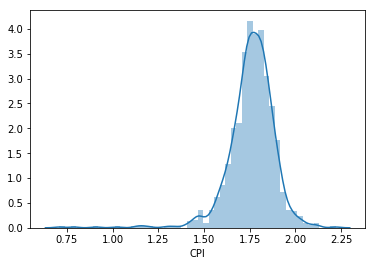

In [9]:
sns.distplot(df['CPI']);

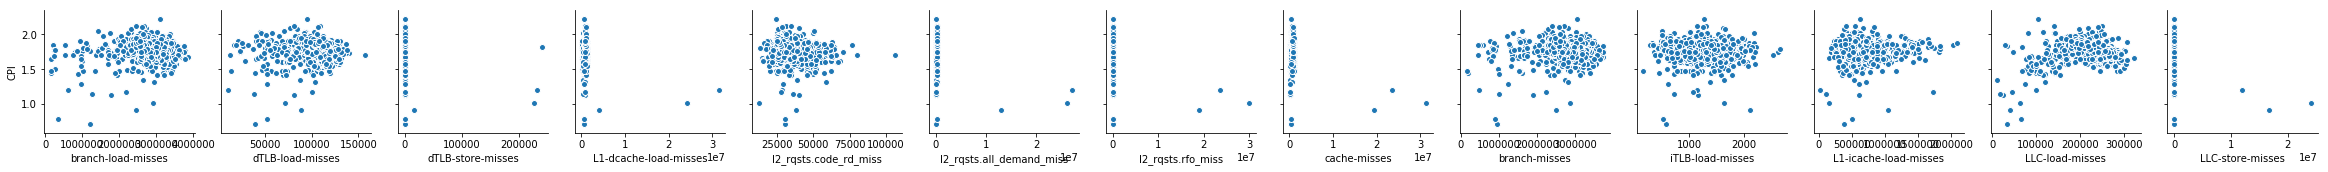

In [10]:
sns.pairplot(df, x_vars=li, y_vars='CPI', aspect=1, kind='scatter')
plt.show()

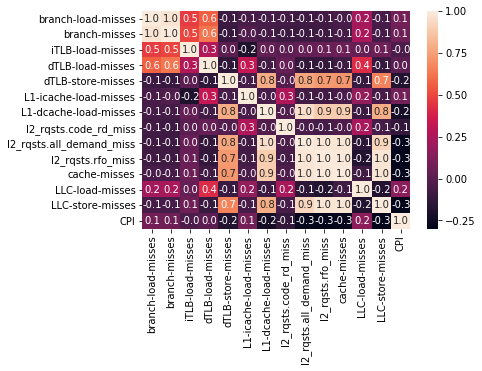

In [11]:
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [13]:
y_train.shape

(808,)

In [14]:
y_test.shape

(202,)

In [15]:
reg_model = linear_model.LinearRegression()

In [16]:
#Fitting the Multiple Linear Regression model
# reg_model = LinearRegression().fit(X_train, y_train)
# print(f"Linear Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [17]:
# from sklearn.linear_model import Ridge
# reg_model = Ridge(alpha=0.9).fit(X_train, y_train)
# print(f"Ridge Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Ridge Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [18]:

# reg_model=LinearRegression(positive= True)
reg_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  1.7010220254409336


[('branch-load-misses', 1.5253788986163106e-07),
 ('dTLB-load-misses', -1.7345103785382755e-06),
 ('dTLB-store-misses', 3.385768547893971e-07),
 ('L1-dcache-load-misses', 1.4673520132941036e-07),
 ('l2_rqsts.code_rd_miss', -3.1065780241991387e-06),
 ('l2_rqsts.all_demand_miss', -7.981848528669674e-07),
 ('l2_rqsts.rfo_miss', 2.6114329456379604e-07),
 ('cache-misses', 7.743636655166582e-07),
 ('branch-misses', -1.215917457284455e-07),
 ('iTLB-load-misses', 2.7106671058833543e-06),
 ('L1-icache-load-misses', 7.564766531445695e-08),
 ('LLC-load-misses', -1.362917030253267e-06),
 ('LLC-store-misses', -6.45152819076827e-07)]

In [20]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [21]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [1.80379385 1.74141594 1.76566858 1.76230785 1.7659684  1.82277939
 1.91201878 1.8068507  1.69307238 1.76002234 1.76992542 1.75630852
 1.80792615 1.8046864  1.80630335 1.83197266 1.77491695 1.72321805
 1.81729911 1.77435104 1.74583538 1.70546267 1.51945952 1.80414592
 1.81387367 1.79145558 1.82850635 1.79831687 1.83145506 1.84073248
 1.82990517 1.79552266 1.78812196 1.68892294 1.74365882 1.80059123
 1.7454243  1.77510659 1.7190636  1.73900411 1.77431549 1.78796473
 1.89302396 1.70363706 1.7106464  1.80261175 1.80506054 1.76352763
 1.76123438 1.78164152 1.78946936 1.76672644 1.7845819  1.73841492
 1.68837086 1.76601418 1.70156994 1.72007058 1.72056381 1.71797416
 1.78758479 1.77485829 1.76644788 1.80465052 1.72343623 1.73441555
 1.81278761 1.79121828 1.76277229 1.78098262 1.78048444 1.73436869
 1.75111494 1.75580414 1.80902194 1.85197001 1.78517192 1.7582151
 1.63628141 1.8176105  1.74596374 1.79076972 1.71823794 1.77052996
 1.77701414 1.75601627 1.75244346 1.77

In [22]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred , '  Residue': y_test-y_pred})


In [23]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
print('F-ststistic value : ' , r2/mse)

print()
print()
mae = metrics.mean_absolute_error(y_train, x_pred)
mse = metrics.mean_squared_error(y_train, x_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_train, x_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)


Mean Absolute Error: 0.08049595130629775
Mean Square Error: 0.012007018850986316
Root Mean Square Error: 0.10957654334293593
R^2 value : 0.21983389327837188
F-ststistic value :  9.126040751900275


Mean Absolute Error: 0.07937681432198548
Mean Square Error: 0.013305235128932984
Root Mean Square Error: 0.11534832087608811
R^2 value : 0.21983389327837188


In [24]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.20965100232718592

In [25]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values

const                       1.063767e-263
branch-load-misses           7.315568e-06
dTLB-load-misses             5.092196e-07
dTLB-store-misses            4.878239e-01
L1-dcache-load-misses        3.396112e-04
l2_rqsts.code_rd_miss        2.207309e-10
l2_rqsts.all_demand_miss     4.737311e-05
l2_rqsts.rfo_miss            1.626726e-01
cache-misses                 1.699521e-12
branch-misses                1.197696e-03
iTLB-load-misses             8.407341e-01
L1-icache-load-misses        6.933211e-05
LLC-load-misses              1.812043e-06
LLC-store-misses             1.252782e-05
Name: P>|t|, dtype: float64